In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('NursingData_clean.csv')

### Overnight sleep times were not reliably recorded prior to mid-August, and until mid-September, were recorded as individual sleep sessions between feedings.  Will need to consolidate overnight sleeps from Months 8 & 9 later to add data and accuracy.

In [4]:
sleep = df[df['Sleep'].notnull()]

In [5]:
nighttime = sleep[(sleep['Sleep'] > 5.) & ((sleep['Month'] > 6) | (sleep['Year'] == 2016))]
nightmonth = nighttime.groupby([nighttime['Year'],nighttime['Month']])

In [6]:
naps = sleep[(sleep['Sleep'] <4.) & ((sleep['Month'] >= 9)|(sleep['Year']==2016)) & (sleep['TimeofDay'] != 'Late night')]
napmonth = naps.groupby([naps['Year'],naps['Month']])

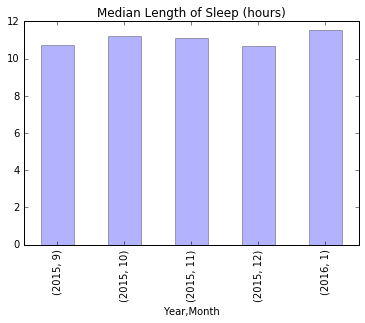

In [7]:
nightmonth['Sleep'].median().plot(kind='bar',color='b',alpha=0.3)
plt.title('Median Length of Sleep (hours)')

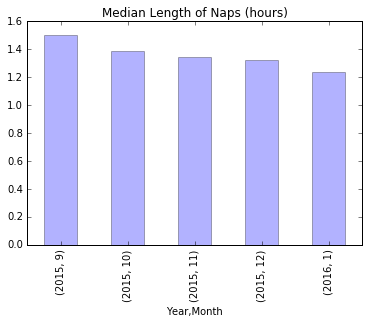

In [8]:
napmonth['Sleep'].median().plot(kind='bar',color='b',alpha=0.3)
plt.title('Median Length of Naps (hours)')